# **Feature Weighting using K-accuracy classification method**

## Testing accessing some UCI datasets

In [ ]:
import pandas as pd

# data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data", sep=',', 
#                    names=['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'])

# data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data", sep=',')

# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.

# data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data", delim_whitespace=True, 
#                    names=['Sequence Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class'])

# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.

# data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep=",", 
#                    names=['Class identifier', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'])

# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.

# data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=',', 
#                    names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])


In [ ]:
# data.head()

,Class identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# print(len(data))

# for i in range(5) :
#   print(data.loc[i, "Class identifier"], data.loc[i, "Alcohol"])

# print("~.~.~.~.~.~.~.~.~.~.~.~.")

# for i in range(5) :
#   print(data.iloc[i, 1], data.iloc[i, 2])

# print("~.~.~.~.~.~.~.~.~.~.~.~.")

# data = data.to_numpy()
# print(data)

178
1 14.23
1 13.2
1 13.16
1 14.37
1 13.24
~.~.~.~.~.~.~.~.~.~.~.~.
14.23 1.71
13.2 1.78
13.16 2.36
14.37 1.95
13.24 2.59
~.~.~.~.~.~.~.~.~.~.~.~.
[[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


## **Imports**

---



In [1]:
import numpy as np
import pandas as pd
from math import inf, sqrt

## **Pre-processing data**

---

In this section, we are going to choose used dataset for the feature-weighting project and pre-process data of UCI datasets declared below.

Links to some UCI datasets that can be used in this project is in the following:
<br/>(The first two datasets tested.)
* [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/Wine)
* [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
* [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris)
* [Parkinsons Data Set](https://archive.ics.uci.edu/ml/datasets/Parkinsons)
* [Yeast Data Set](https://archive.ics.uci.edu/ml/datasets/Yeast)

### *Wine Data Set*

In [2]:
# download dataset
def wine_dataset():
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep=",", 
                    names=['Class identifier', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'])

  # remove 'Class identifier' coloumn from dataset
  data_Y = data[['Class identifier']].copy()
  data_X = data.drop(['Class identifier'], axis=1)

  # convert it to numpy array
  X_set = data_X.to_numpy()
  Y_set = data_Y.to_numpy()
  Y_set = Y_set.reshape((1, 178))[0]

  return X_set, Y_set

# wine_dataset()

### *Heart Disease Data Set*

In [3]:
# download dataset
# num shows the presence of heart attack(1, 2, 3, 4) & absence of heart attack.
def heart_disease_dataset():
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", sep=",", 
                    names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',  'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

  # remove rows with missing value ('?')
  tmp = []
  for i in range(data.shape[0]):
    flag = False
    for j in range(data.shape[1]):
      if data.iloc[i, j] == '?':
        flag = True
        break
    if flag == True:
      tmp.append(i)
  data = data.drop(tmp, axis=0)  

  # cnvert columns 'ca' & 'thal' to numeric-type
  data['ca'] = pd.to_numeric(data['ca'])
  data['thal'] = pd.to_numeric(data['thal'])

  # remove 'num' coloumn from dataset
  data_Y = data[['num']].copy()
  data_X = data.drop(['num'], axis=1)

  # convert it to numpy array
  X_set = data_X.to_numpy()
  Y_set = data_Y.to_numpy()
  Y_set = Y_set.reshape((1, 297))[0]

  return X_set, Y_set

# heart_disease_dataset()

### *Iris Data Set*

In [4]:
# download dataset
def iris_dataset():
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=',', 
                    names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

  # drop duplicate values from dataset
  data.drop_duplicates(keep=False,inplace=True)

  # remove 'class' coloumn from dataset
  data_Y = data[['class']].copy()
  data_X = data.drop(['class'], axis=1)

  # convert it to numpy array
  X_set = data_X.to_numpy()
  Y_set = data_Y.to_numpy()
  Y_set = Y_set.reshape((1, 145))[0]

  return X_set, Y_set

# iris_dataset()

## **Define functions**

---



In [5]:
def initialize_parameters(epochs=20, alpha=0.1, beta=0.05, k=2):
  """ Function to initialize some parameters e.g. feature-weights, beta, alpha, etc."""

  num_of_instances = len(X_set)
  num_of_features = len(X_set[1])
  feature_weights = np.ones(num_of_features)

  return {'feature_weights':feature_weights, 'num_of_features':num_of_features, 'num_of_instances':num_of_instances, 'k':k, 'alpha':alpha, 'beta':beta, 'epochs':epochs}


# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.


def d2e(x1, x2, feature_weights):
  """ Function to calculate square of distance between two instances of dataset based on weights of features. 
      - x1: first instance of dataset
      - x2: second instance of dataset
      - feature_weights: weights of features

      - d2e = sigma( [x1[i]-x2[i])**2] * feature_weights[i] )
  """

  dist = 0;
  for i in range(len(x1)):
    dist += np.power((x1[i] - x2[i]), 2) * feature_weights[i]
  return dist


# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.


def step(z):
  """ Step function to calculate the accuracy of model. Non-derivative."""

  if z >= 1:
    return 1
  return 0


# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.


def sigmoid(z, beta):
  """ Sigmoid function to calculate the accuracy of model. Derivative.
      - z: input
      - beta: if beta=0 -> sigmoid(z)=1/(1+exp(-z))
  """

  return 1./(1 + np.exp(beta*(1-z)))


# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.


def sigmoid_derivative(z, beta):
    """ Derivative of sigmoid function used to get the gradient of objective function Jw."""

    return beta * sigmoid(z, beta) * (1 - sigmoid(z, beta))


# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.


def update_feature_weights(feature_weights, gradient, alpha):
  """ Update weights of features using geadient ascent method.
      gradient[i] -> shows derivative of Jw to wi
  """ 

  for i in range(len(feature_weights)):
    feature_weights[i] += alpha * gradient[i]
  # print(feature_weights)
  return feature_weights

## **Implement the model and learn feature-weights**

---


In [ ]:
# initilizing
X_set, Y_set = iris_dataset()
Jw_accuracy_procedure = []                        # variable to store Jw for ploting
model_params = initialize_parameters()
N = model_params['num_of_instances']
k = model_params['k']
alpha = model_params['alpha']
beta = model_params['beta']

#**Learn feature weights**

In [6]:
def learn_feature_weights():

  distances = []

  # load previoud feature-weights
  feature_weights = model_params['feature_weights']

  for epoch in range(model_params['epochs']+1):
    
    Jw_gradient = np.zeros(model_params['num_of_features'])
    Jw_accuarcy_xi = 0

    for i in range(model_params['num_of_instances']):
      xi = X_set[i]
      xi_distances_array = []
      nearest_positive_instance_index = 0
      nearest_positive_instance_distance = inf
      
      for j in range(model_params['num_of_instances']):
        xj = X_set[j]

        # calculate d2e of x1 & x2 based on feature weights
        # we use leave_one_out technique, so first check the index of x1 & x2
        if i != j:
          dist = d2e(xi, xj, feature_weights)

          xi_distances_array.append((dist, j))

          # calculate distance of xi to nearest positive instance(x=)
          # label of xi & xj must be the same
          # the distance is least
          if dist < nearest_positive_instance_distance and Y_set[i] == Y_set[j]:
            nearest_positive_instance_distance = dist
            nearest_positive_instance_index = j
      
      # sort xi_distances_array based on dist parameter to get k-nearest neighbors
      # sort list of tuples based on first element
      xi_distances_array.sort(key=lambda s:s[0])

      # calculate the radius of xi to kth-nearest instance
      kth_nearest_instance_index = xi_distances_array[k][1]
      Rw = d2e(xi, X_set[kth_nearest_instance_index], feature_weights)
      
      # calculate rx
      rx = Rw / nearest_positive_instance_distance

      # calculate partial gradient of current xi
      # derivative of Jw to each wi
      for f in range(model_params['num_of_features']):
        Jw_gradient[f] += -1 * sigmoid_derivative(rx, beta) * rx * (pow((X_set[i][f] - X_set[nearest_positive_instance_index][f]), 2)/nearest_positive_instance_distance)

      Jw_accuarcy_xi += step(rx)/N


    # update feature weights
    # print("epoch: ", epoch, "   ----   Jw_accuracy: ", Jw_accuarcy_xi)
    Jw_gradient *= 1/N
    feature_weights = update_feature_weights(feature_weights, Jw_gradient, alpha)

    Jw_accuracy_procedure.append(Jw_accuarcy_xi)

    model_params['feature_weights'] = feature_weights


In [ ]:
learn_feature_weights()

epoch:  0    ----   Jw_accuracy:  0.9655172413793119
epoch:  1    ----   Jw_accuracy:  0.9655172413793119
epoch:  2    ----   Jw_accuracy:  0.9655172413793119
epoch:  3    ----   Jw_accuracy:  0.9655172413793119
epoch:  4    ----   Jw_accuracy:  0.9655172413793119
epoch:  5    ----   Jw_accuracy:  0.9655172413793119
epoch:  6    ----   Jw_accuracy:  0.9655172413793119
epoch:  7    ----   Jw_accuracy:  0.9655172413793119
epoch:  8    ----   Jw_accuracy:  0.9655172413793119
epoch:  9    ----   Jw_accuracy:  0.9655172413793119
epoch:  10    ----   Jw_accuracy:  0.9655172413793119
epoch:  11    ----   Jw_accuracy:  0.9655172413793119
epoch:  12    ----   Jw_accuracy:  0.9655172413793119
epoch:  13    ----   Jw_accuracy:  0.9655172413793119
epoch:  14    ----   Jw_accuracy:  0.9655172413793119
epoch:  15    ----   Jw_accuracy:  0.9655172413793119
epoch:  16    ----   Jw_accuracy:  0.9655172413793119
epoch:  17    ----   Jw_accuracy:  0.9655172413793119
epoch:  18    ----   Jw_accuracy:  0.9

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot Jw
def plot(arr):
  x = [i/len(X_set) for i in range(len(arr))]
  
  plt.scatter(x, arr)
  plt.show()
  

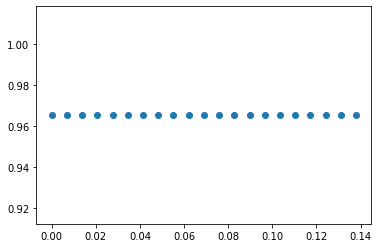

In [ ]:
plot(Jw_accuracy_procedure)

In [8]:
# predict class of new instance
def predict(new_x, k):
  distances = []
  for i in range(len(X_set)):
    xi = X_set[i]
    temp_dist = d2e(new_x, xi, model_params['feature_weights'])
    
    # except the exact instance since here I test it with the dataset it self
    if temp_dist != 0:
      distances.append((temp_dist, i))
  
  # sort the array based on distance to get kth-nearest instances labels and check if the correct label in within it or not
  distances.sort(key=lambda s:s[0])

  indexes = [distances[i][1] for i in range(len(distances))]
  labels = [Y_set[distances[i][1]] for i in range(len(distances))]
  return labels[:k]


def get_accuracy(k):
  acc = 0
  for i in range(len(X_set)):
    predicted_label = predict(X_set[i], k)
    # print('i: ', i, '     real label: ', Y_set[i], "     predicted label: ", predicted_label)
    if Y_set[i] in predicted_label:
      acc += 1
  
  return acc*100/len(X_set)


In [ ]:
print(get_accuracy(k))

95.86206896551724


#**Wine dataset results, epochs:30**

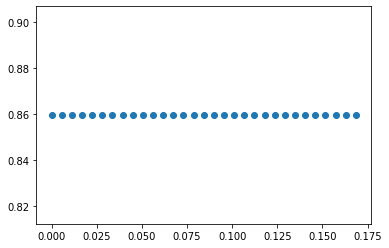

k:  1     beta:  0.05     alpha:  0.1     acc:  76.96629213483146


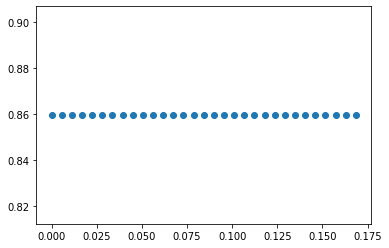

k:  1     beta:  0.05     alpha:  0.01     acc:  76.96629213483146


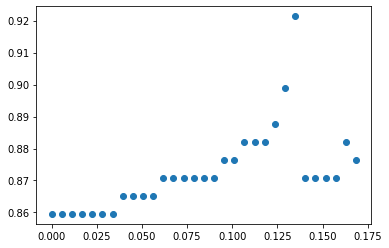

k:  1     beta:  5     alpha:  0.1     acc:  70.78651685393258


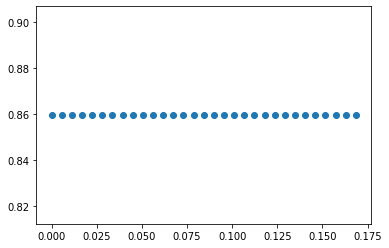

k:  1     beta:  5     alpha:  0.01     acc:  76.96629213483146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


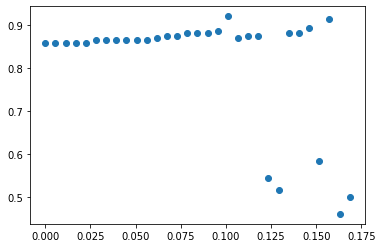

k:  1     beta:  10     alpha:  0.1     acc:  56.17977528089887


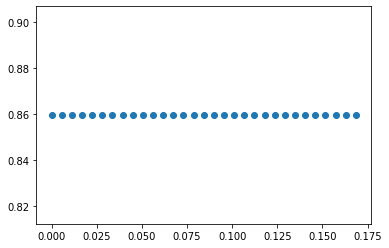

k:  1     beta:  10     alpha:  0.01     acc:  76.96629213483146


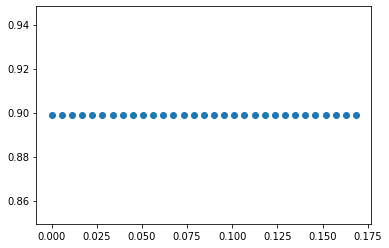

k:  2     beta:  0.05     alpha:  0.1     acc:  85.95505617977528


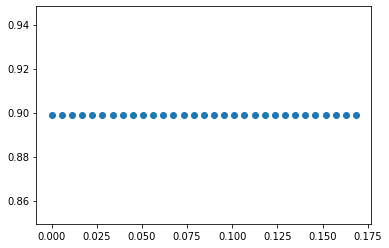

k:  2     beta:  0.05     alpha:  0.01     acc:  85.95505617977528


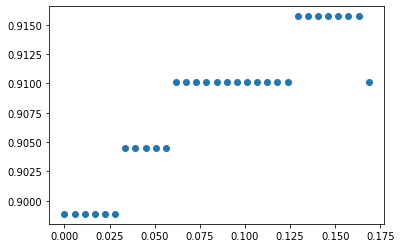

k:  2     beta:  5     alpha:  0.1     acc:  88.20224719101124


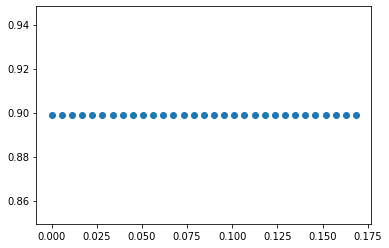

k:  2     beta:  5     alpha:  0.01     acc:  85.95505617977528


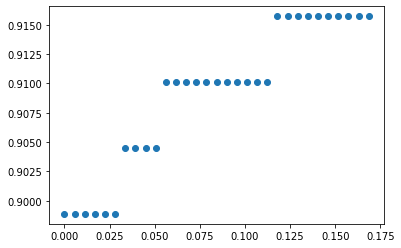

k:  2     beta:  10     alpha:  0.1     acc:  88.20224719101124


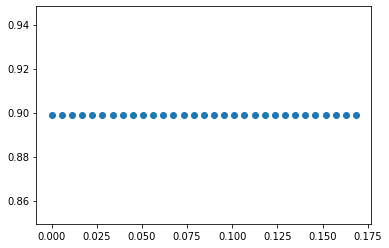

k:  2     beta:  10     alpha:  0.01     acc:  85.95505617977528


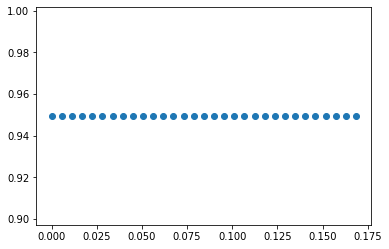

k:  3     beta:  0.05     alpha:  0.1     acc:  89.88764044943821


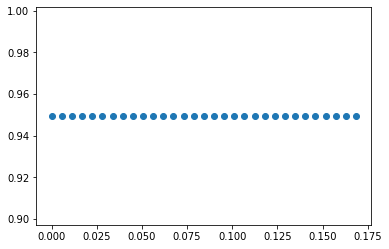

k:  3     beta:  0.05     alpha:  0.01     acc:  89.88764044943821


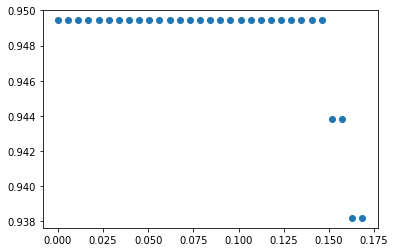

k:  3     beta:  5     alpha:  0.1     acc:  91.01123595505618


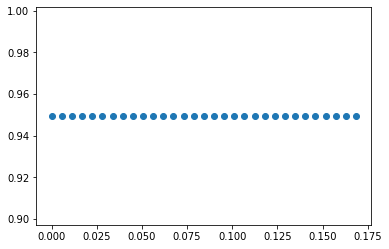

k:  3     beta:  5     alpha:  0.01     acc:  89.88764044943821


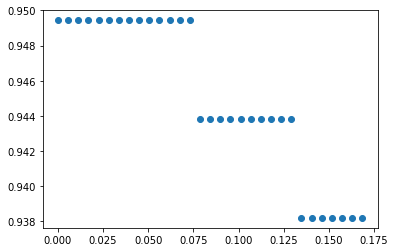

k:  3     beta:  10     alpha:  0.1     acc:  91.57303370786516


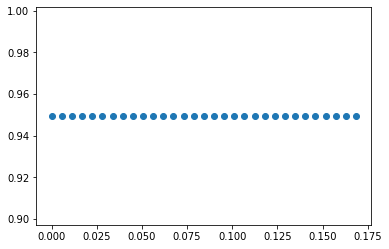

k:  3     beta:  10     alpha:  0.01     acc:  89.88764044943821


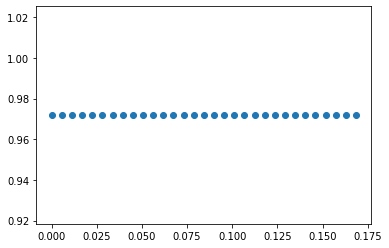

k:  4     beta:  0.05     alpha:  0.1     acc:  94.9438202247191


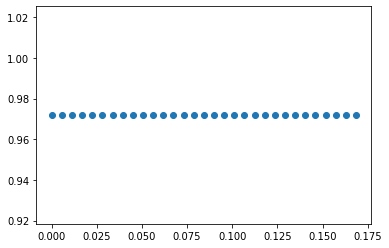

k:  4     beta:  0.05     alpha:  0.01     acc:  94.9438202247191


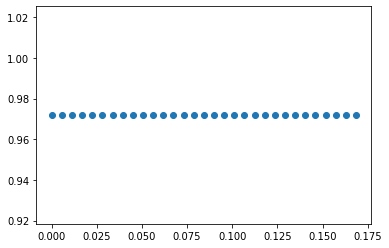

k:  4     beta:  5     alpha:  0.1     acc:  94.9438202247191


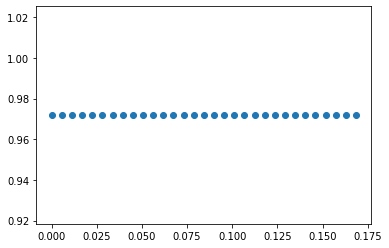

k:  4     beta:  5     alpha:  0.01     acc:  94.9438202247191


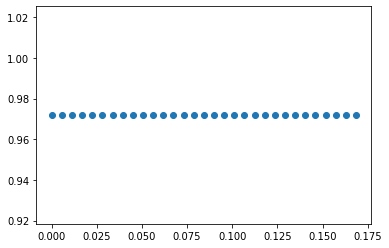

k:  4     beta:  10     alpha:  0.1     acc:  94.9438202247191


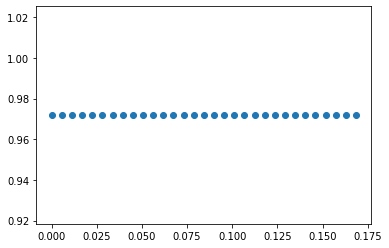

k:  4     beta:  10     alpha:  0.01     acc:  94.9438202247191


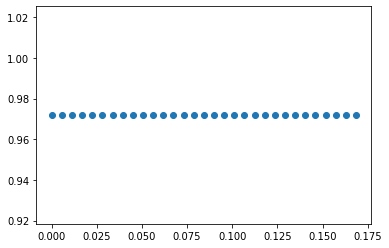

k:  5     beta:  0.05     alpha:  0.1     acc:  97.19101123595506


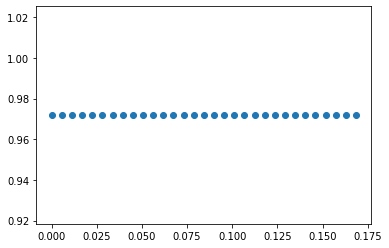

k:  5     beta:  0.05     alpha:  0.01     acc:  97.19101123595506


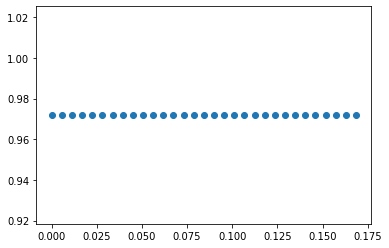

k:  5     beta:  5     alpha:  0.1     acc:  97.19101123595506


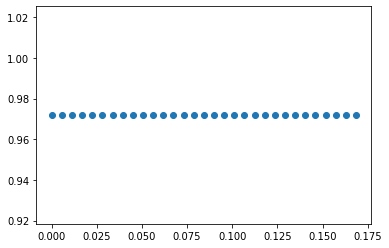

k:  5     beta:  5     alpha:  0.01     acc:  97.19101123595506


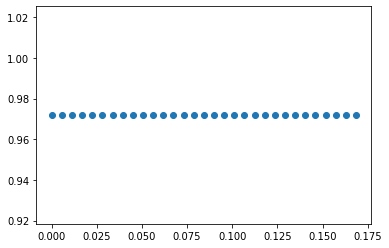

k:  5     beta:  10     alpha:  0.1     acc:  97.19101123595506


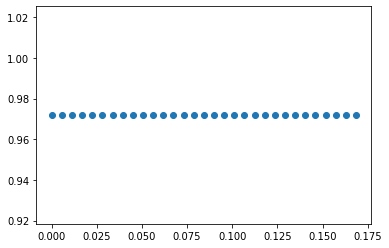

k:  5     beta:  10     alpha:  0.01     acc:  97.19101123595506


In [ ]:
X_set, Y_set = wine_dataset()

for k in range(1, 6):
  for beta in [0.05, 5, 10]:
    for alpha in [0.1, 0.01]:
      # initialize
      Jw_accuracy_procedure = []                        # variable to store Jw for ploting
      model_params = initialize_parameters(epochs=30, alpha=alpha, beta=beta, k=k)
      N = model_params['num_of_instances']
      k = model_params['k']
      alpha = model_params['alpha']
      beta = model_params['beta']

      learn_feature_weights()

      plot(Jw_accuracy_procedure)
      print("k: ", k, "    beta: ", beta, "    alpha: ", alpha, "    acc: ", get_accuracy(k))

#**Heart-Disease dataset results, epochs:30**

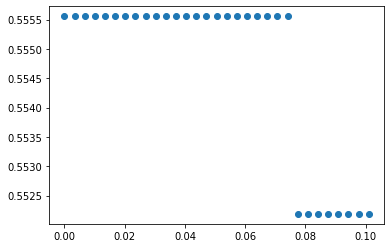

k:  1     beta:  0.05     alpha:  0.1     acc:  41.41414141414141


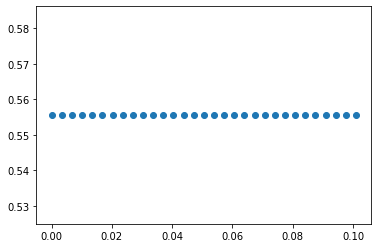

k:  1     beta:  0.05     alpha:  0.01     acc:  41.41414141414141


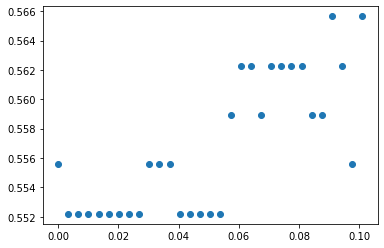

k:  1     beta:  5     alpha:  0.1     acc:  43.0976430976431


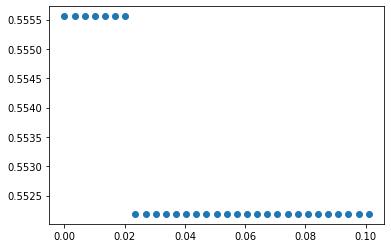

k:  1     beta:  5     alpha:  0.01     acc:  41.75084175084175


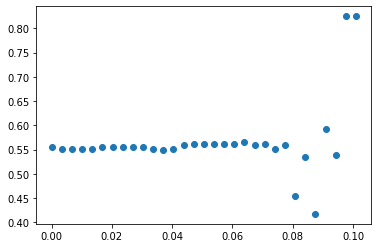

k:  1     beta:  10     alpha:  0.1     acc:  17.50841750841751


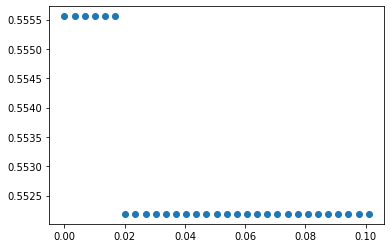

k:  1     beta:  10     alpha:  0.01     acc:  41.75084175084175


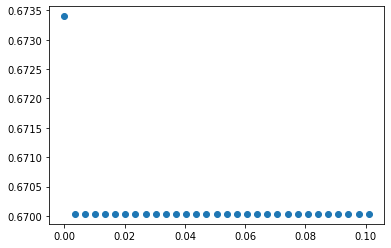

k:  2     beta:  0.05     alpha:  0.1     acc:  55.21885521885522


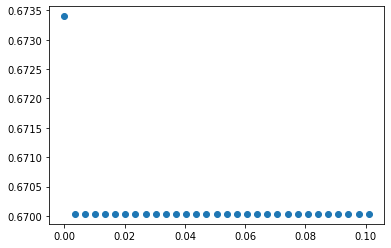

k:  2     beta:  0.05     alpha:  0.01     acc:  55.55555555555556


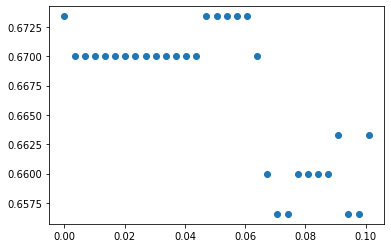

k:  2     beta:  5     alpha:  0.1     acc:  55.89225589225589


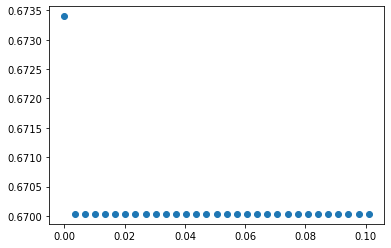

k:  2     beta:  5     alpha:  0.01     acc:  55.21885521885522


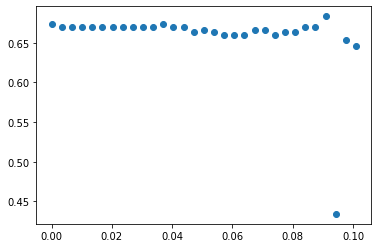

k:  2     beta:  10     alpha:  0.1     acc:  56.56565656565657


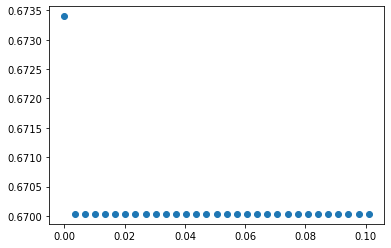

k:  2     beta:  10     alpha:  0.01     acc:  55.21885521885522


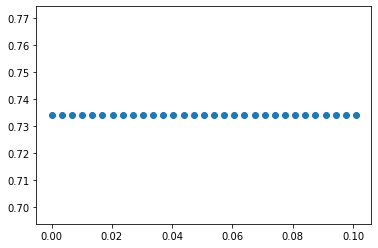

k:  3     beta:  0.05     alpha:  0.1     acc:  67.003367003367


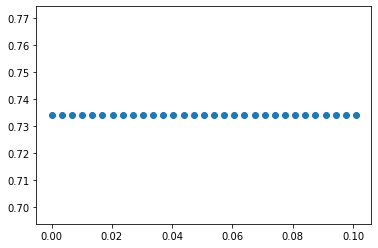

k:  3     beta:  0.05     alpha:  0.01     acc:  67.003367003367


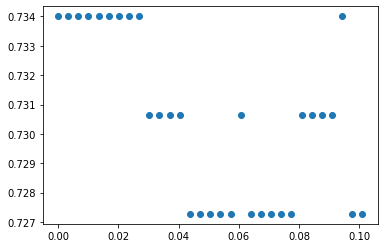

k:  3     beta:  5     alpha:  0.1     acc:  65.993265993266


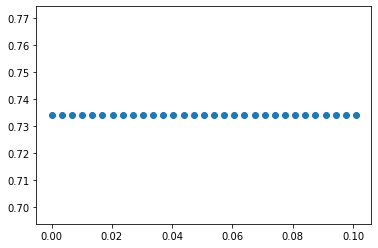

k:  3     beta:  5     alpha:  0.01     acc:  67.003367003367


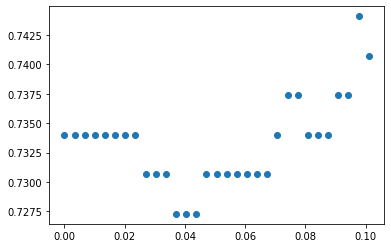

k:  3     beta:  10     alpha:  0.1     acc:  68.68686868686869


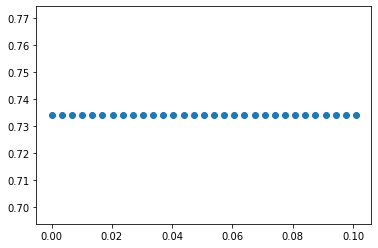

k:  3     beta:  10     alpha:  0.01     acc:  67.003367003367


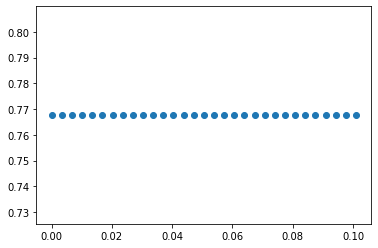

k:  4     beta:  0.05     alpha:  0.1     acc:  73.4006734006734


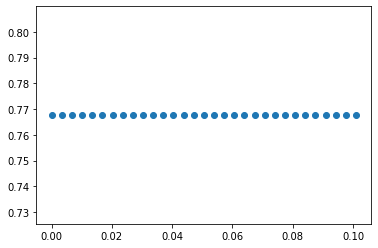

k:  4     beta:  0.05     alpha:  0.01     acc:  73.4006734006734


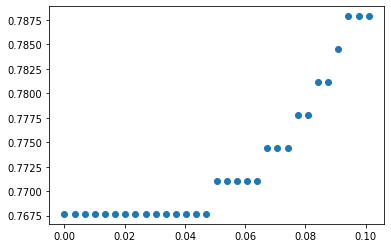

k:  4     beta:  5     alpha:  0.1     acc:  72.72727272727273


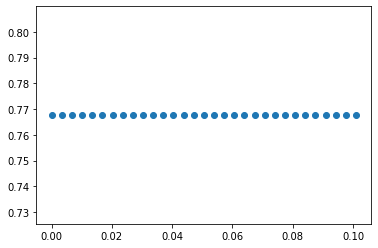

k:  4     beta:  5     alpha:  0.01     acc:  73.4006734006734


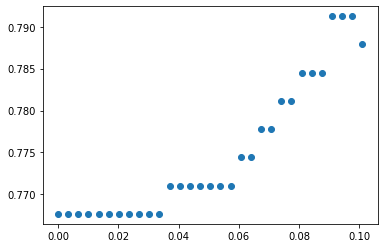

k:  4     beta:  10     alpha:  0.1     acc:  73.73737373737374


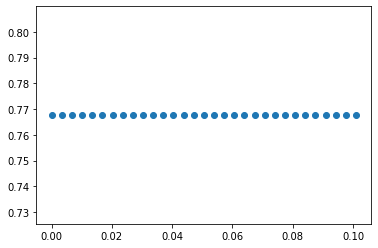

k:  4     beta:  10     alpha:  0.01     acc:  73.4006734006734


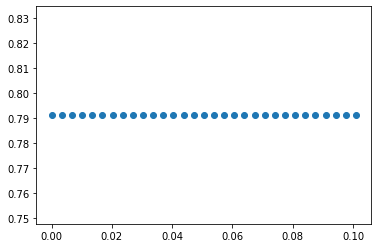

k:  5     beta:  0.05     alpha:  0.1     acc:  76.76767676767676


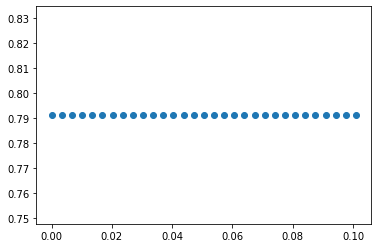

k:  5     beta:  0.05     alpha:  0.01     acc:  76.76767676767676


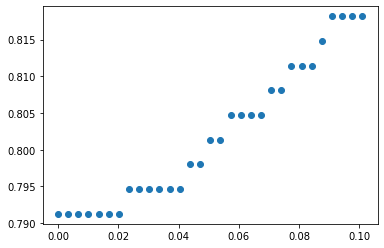

k:  5     beta:  5     alpha:  0.1     acc:  78.78787878787878


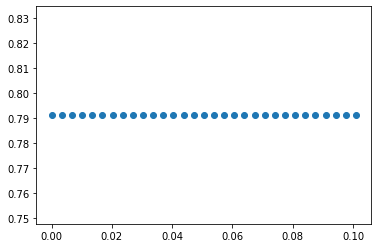

k:  5     beta:  5     alpha:  0.01     acc:  76.76767676767676


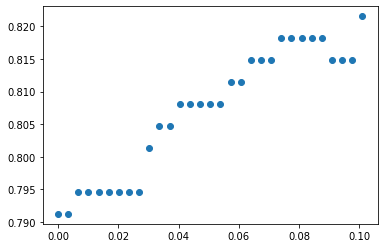

k:  5     beta:  10     alpha:  0.1     acc:  78.78787878787878


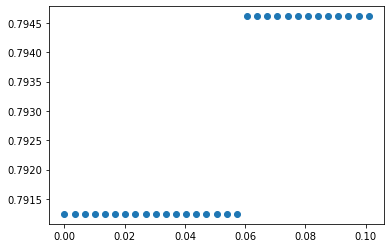

k:  5     beta:  10     alpha:  0.01     acc:  76.76767676767676


In [ ]:
X_set, Y_set = heart_disease_dataset()

for k in range(1, 6):
  for beta in [0.05, 5, 10]:
    for alpha in [0.1, 0.01]:
      # initialize
      Jw_accuracy_procedure = []                        # variable to store Jw for ploting
      model_params = initialize_parameters(epochs=30, alpha=alpha, beta=beta, k=k)
      N = model_params['num_of_instances']
      k = model_params['k']
      alpha = model_params['alpha']
      beta = model_params['beta']

      learn_feature_weights()

      plot(Jw_accuracy_procedure)
      print("k: ", k, "    beta: ", beta, "    alpha: ", alpha, "    acc: ", get_accuracy(k))

#**Iris dataset results, epochs:30**

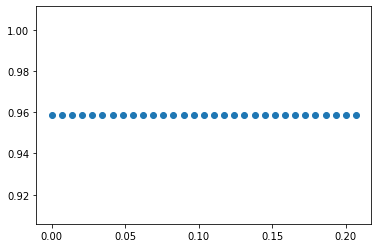

k:  1     beta:  0.05     alpha:  0.1     acc:  95.86206896551724


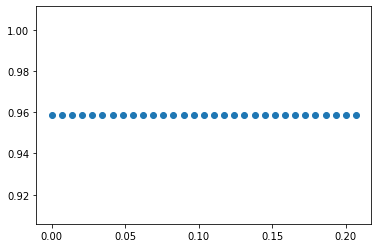

k:  1     beta:  0.05     alpha:  0.01     acc:  95.86206896551724


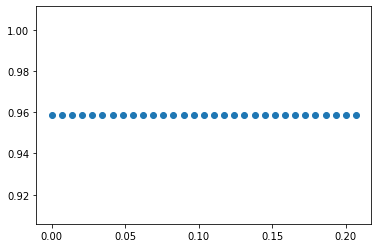

k:  1     beta:  5     alpha:  0.1     acc:  95.17241379310344


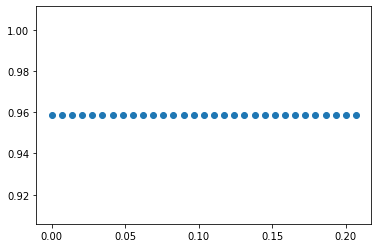

k:  1     beta:  5     alpha:  0.01     acc:  95.86206896551724


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


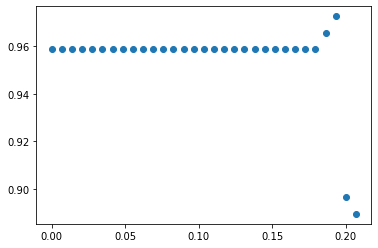

k:  1     beta:  10     alpha:  0.1     acc:  0.0


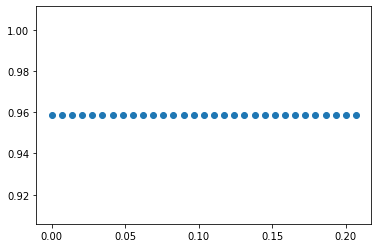

k:  1     beta:  10     alpha:  0.01     acc:  95.86206896551724


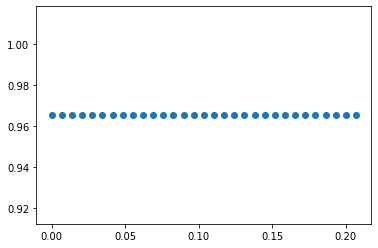

k:  2     beta:  0.05     alpha:  0.1     acc:  95.86206896551724


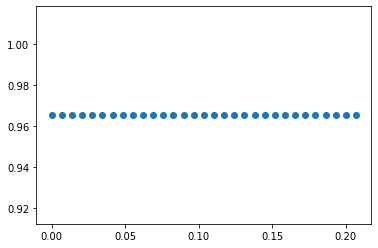

k:  2     beta:  0.05     alpha:  0.01     acc:  95.86206896551724


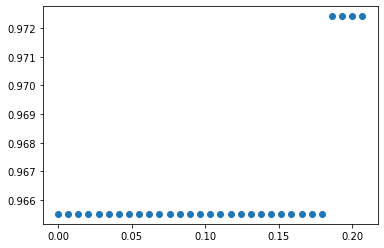

k:  2     beta:  5     alpha:  0.1     acc:  95.86206896551724


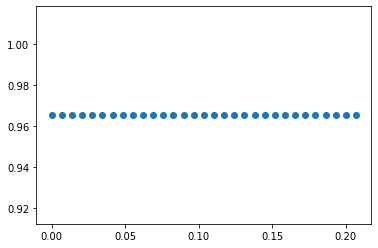

k:  2     beta:  5     alpha:  0.01     acc:  95.86206896551724


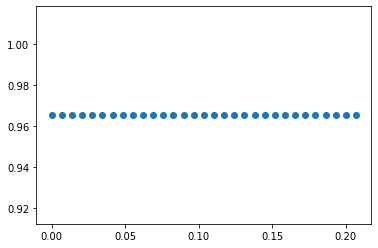

k:  2     beta:  10     alpha:  0.1     acc:  95.86206896551724


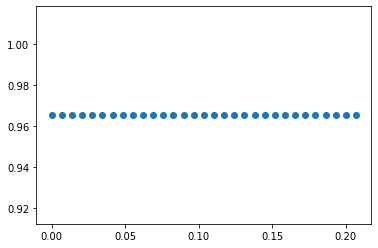

k:  2     beta:  10     alpha:  0.01     acc:  95.86206896551724


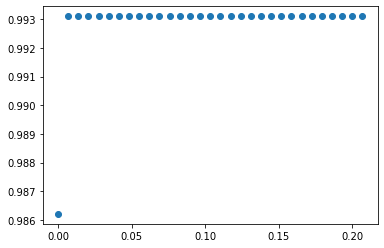

k:  3     beta:  0.05     alpha:  0.1     acc:  96.55172413793103


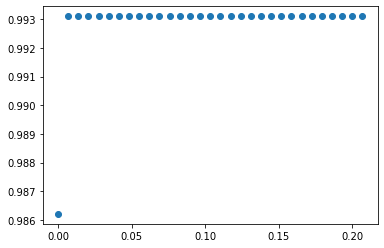

k:  3     beta:  0.05     alpha:  0.01     acc:  96.55172413793103


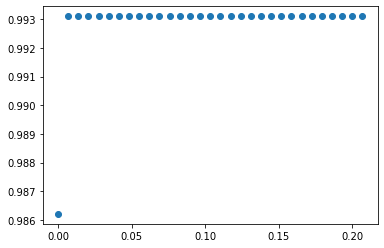

k:  3     beta:  5     alpha:  0.1     acc:  96.55172413793103


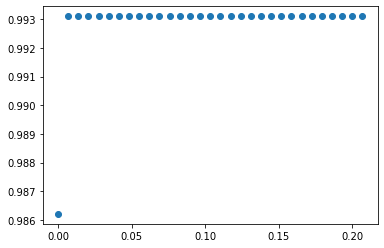

k:  3     beta:  5     alpha:  0.01     acc:  96.55172413793103


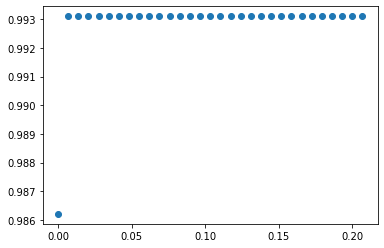

k:  3     beta:  10     alpha:  0.1     acc:  96.55172413793103


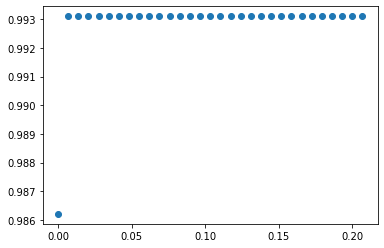

k:  3     beta:  10     alpha:  0.01     acc:  96.55172413793103


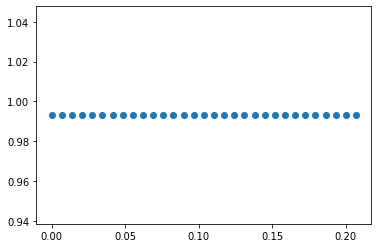

k:  4     beta:  0.05     alpha:  0.1     acc:  99.3103448275862


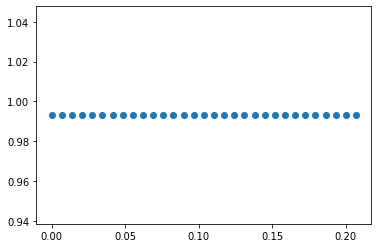

k:  4     beta:  0.05     alpha:  0.01     acc:  99.3103448275862


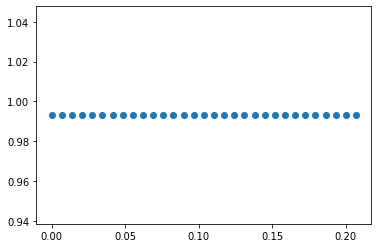

k:  4     beta:  5     alpha:  0.1     acc:  99.3103448275862


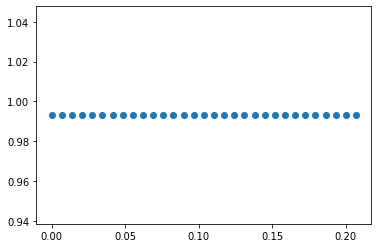

k:  4     beta:  5     alpha:  0.01     acc:  99.3103448275862


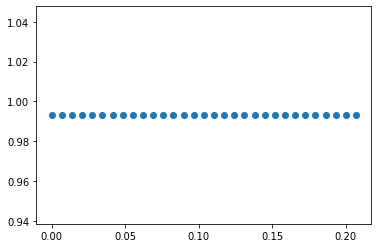

k:  4     beta:  10     alpha:  0.1     acc:  99.3103448275862


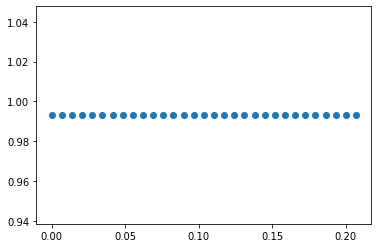

k:  4     beta:  10     alpha:  0.01     acc:  99.3103448275862


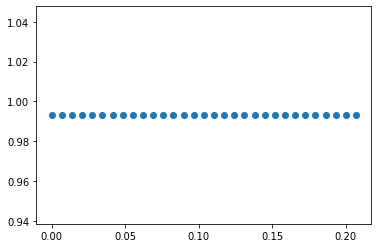

k:  5     beta:  0.05     alpha:  0.1     acc:  99.3103448275862


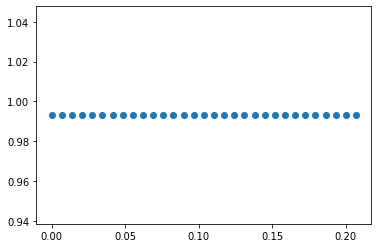

k:  5     beta:  0.05     alpha:  0.01     acc:  99.3103448275862


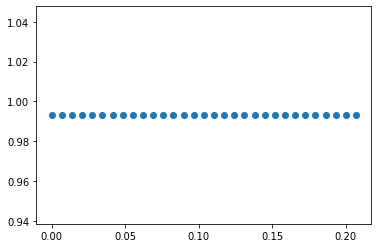

k:  5     beta:  5     alpha:  0.1     acc:  99.3103448275862


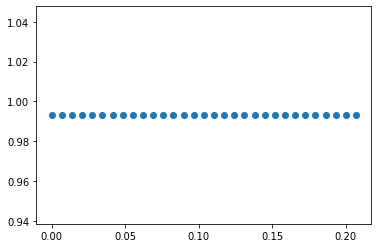

k:  5     beta:  5     alpha:  0.01     acc:  99.3103448275862


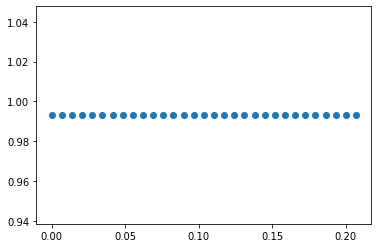

k:  5     beta:  10     alpha:  0.1     acc:  99.3103448275862


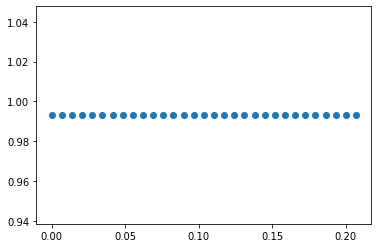

k:  5     beta:  10     alpha:  0.01     acc:  99.3103448275862


In [ ]:
X_set, Y_set = iris_dataset()

for k in range(1, 6):
  for beta in [0.05, 5, 10]:
    for alpha in [0.1, 0.01]:
      # initialize
      Jw_accuracy_procedure = []                        # variable to store Jw for ploting
      model_params = initialize_parameters(epochs=30, alpha=alpha, beta=beta, k=k)
      N = model_params['num_of_instances']
      k = model_params['k']
      alpha = model_params['alpha']
      beta = model_params['beta']

      learn_feature_weights()
      
      plot(Jw_accuracy_procedure)
      print("k: ", k, "    beta: ", beta, "    alpha: ", alpha, "    acc: ", get_accuracy(k))

#**Wine dataset results, epochs:60**

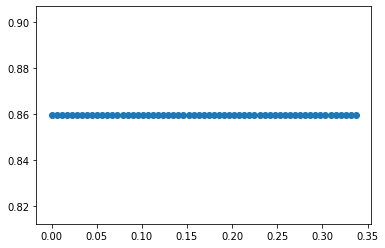

k:  1     beta:  0.05     alpha:  0.1     acc:  76.40449438202248


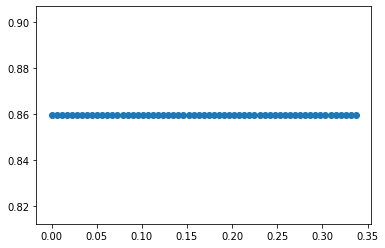

k:  1     beta:  0.05     alpha:  0.01     acc:  76.96629213483146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


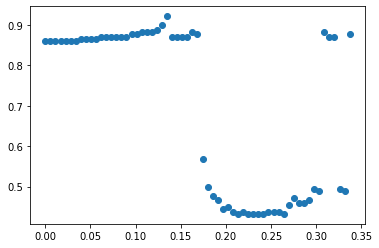

k:  1     beta:  5     alpha:  0.1     acc:  77.52808988764045


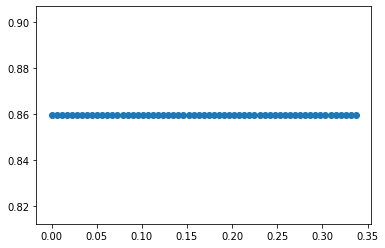

k:  1     beta:  5     alpha:  0.01     acc:  75.84269662921348


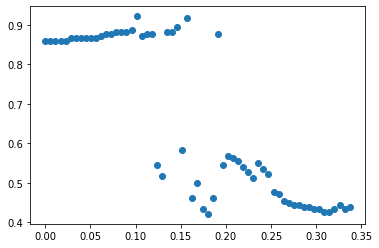

k:  1     beta:  10     alpha:  0.1     acc:  55.61797752808989


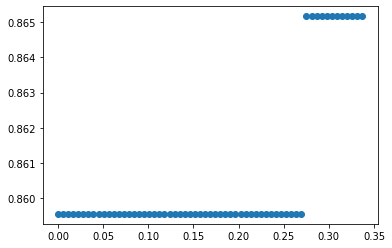

k:  1     beta:  10     alpha:  0.01     acc:  76.40449438202248


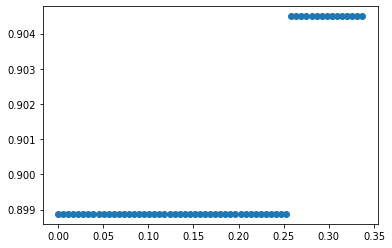

k:  2     beta:  0.05     alpha:  0.1     acc:  85.95505617977528


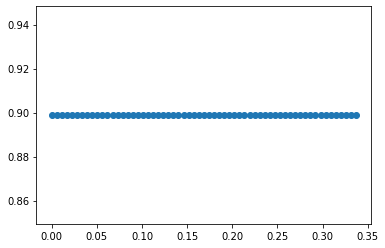

k:  2     beta:  0.05     alpha:  0.01     acc:  85.95505617977528


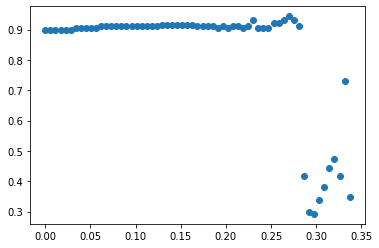

k:  2     beta:  5     alpha:  0.1     acc:  87.07865168539325


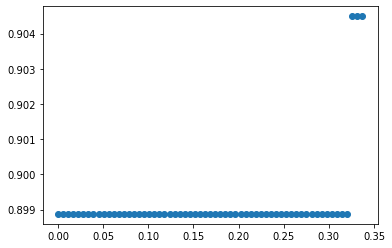

k:  2     beta:  5     alpha:  0.01     acc:  85.95505617977528


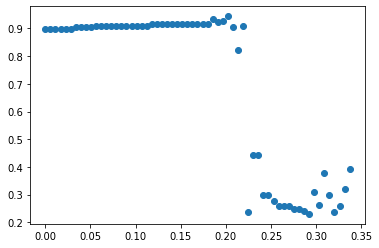

k:  2     beta:  10     alpha:  0.1     acc:  86.51685393258427


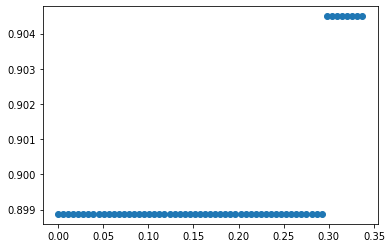

k:  2     beta:  10     alpha:  0.01     acc:  85.95505617977528


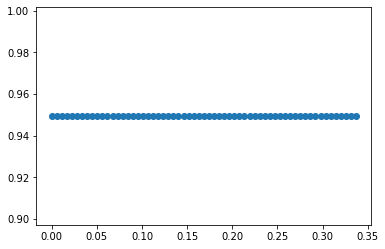

k:  3     beta:  0.05     alpha:  0.1     acc:  90.4494382022472


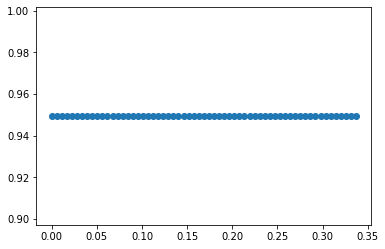

k:  3     beta:  0.05     alpha:  0.01     acc:  89.88764044943821


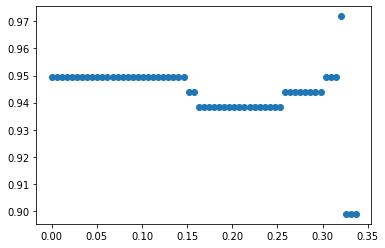

k:  3     beta:  5     alpha:  0.1     acc:  10.112359550561798


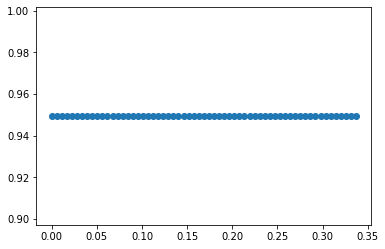

k:  3     beta:  5     alpha:  0.01     acc:  89.88764044943821


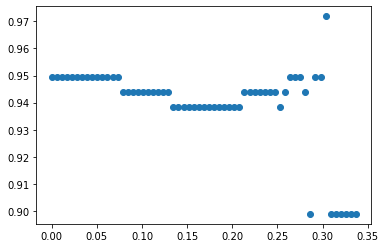

k:  3     beta:  10     alpha:  0.1     acc:  10.112359550561798


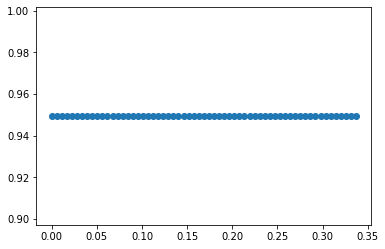

k:  3     beta:  10     alpha:  0.01     acc:  89.88764044943821


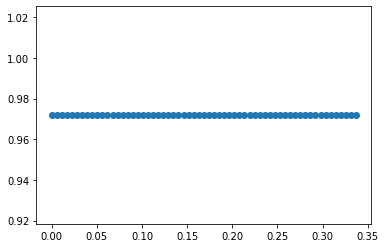

k:  4     beta:  0.05     alpha:  0.1     acc:  94.9438202247191


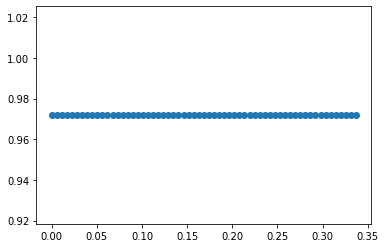

k:  4     beta:  0.05     alpha:  0.01     acc:  94.9438202247191


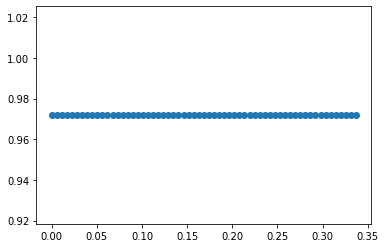

k:  4     beta:  5     alpha:  0.1     acc:  93.82022471910112


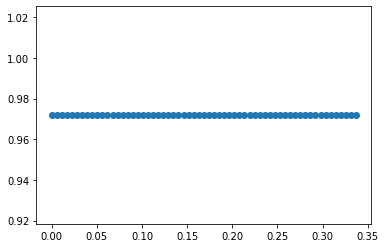

k:  4     beta:  5     alpha:  0.01     acc:  94.9438202247191


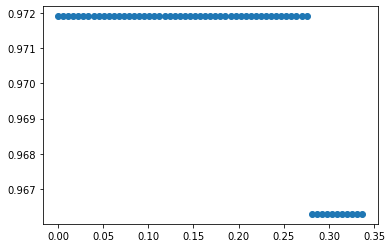

k:  4     beta:  10     alpha:  0.1     acc:  94.9438202247191


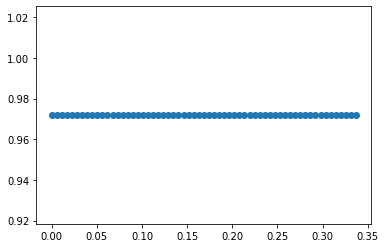

k:  4     beta:  10     alpha:  0.01     acc:  94.9438202247191


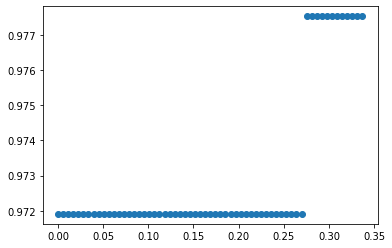

k:  5     beta:  0.05     alpha:  0.1     acc:  96.62921348314607


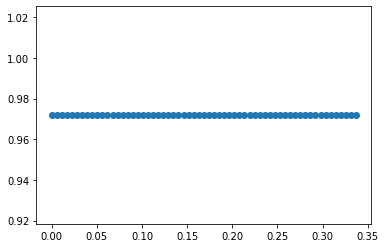

k:  5     beta:  0.05     alpha:  0.01     acc:  97.19101123595506


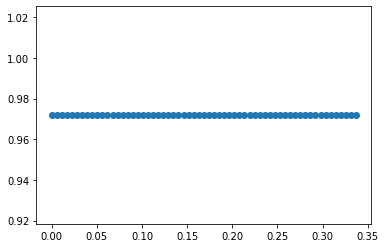

k:  5     beta:  5     alpha:  0.1     acc:  97.19101123595506


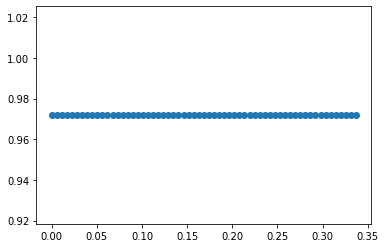

k:  5     beta:  5     alpha:  0.01     acc:  97.19101123595506


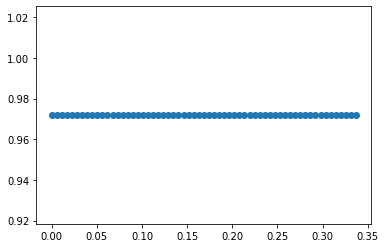

k:  5     beta:  10     alpha:  0.1     acc:  97.19101123595506


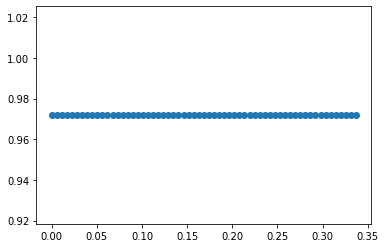

k:  5     beta:  10     alpha:  0.01     acc:  97.19101123595506


In [9]:
X_set, Y_set = wine_dataset()

for k in range(1, 6):
  for beta in [0.05, 5, 10]:
    for alpha in [0.1, 0.01]:
      # initialize
      Jw_accuracy_procedure = []                        # variable to store Jw for ploting
      model_params = initialize_parameters(epochs=60, alpha=alpha, beta=beta, k=k)
      N = model_params['num_of_instances']
      k = model_params['k']
      alpha = model_params['alpha']
      beta = model_params['beta']

      learn_feature_weights()

      plot(Jw_accuracy_procedure)
      print("k: ", k, "    beta: ", beta, "    alpha: ", alpha, "    acc: ", get_accuracy(k))

#**Heart-Disease dataset results, epochs:60**

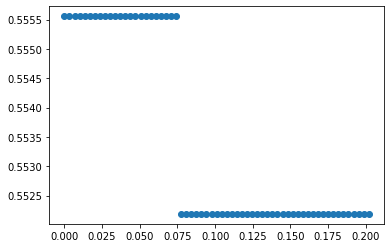

k:  1     beta:  0.05     alpha:  0.1     acc:  41.41414141414141


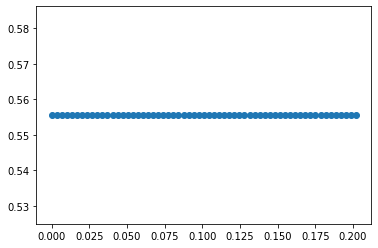

k:  1     beta:  0.05     alpha:  0.01     acc:  41.41414141414141


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


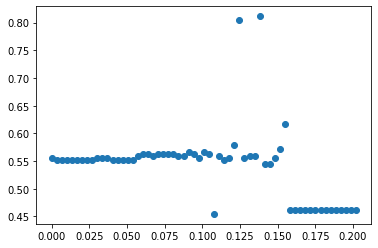

k:  1     beta:  5     alpha:  0.1     acc:  53.872053872053876


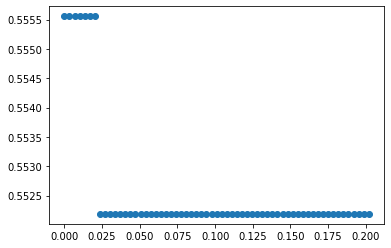

k:  1     beta:  5     alpha:  0.01     acc:  41.75084175084175


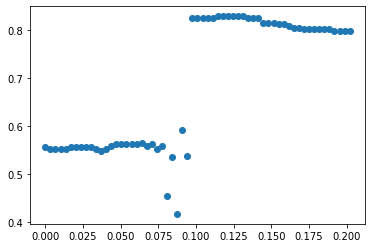

k:  1     beta:  10     alpha:  0.1     acc:  19.865319865319865


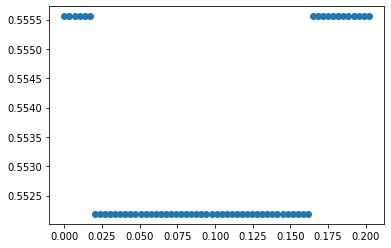

k:  1     beta:  10     alpha:  0.01     acc:  41.41414141414141


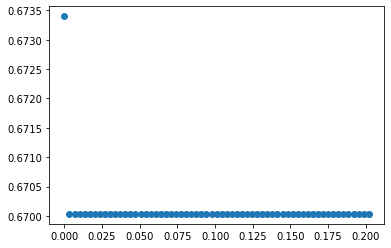

k:  2     beta:  0.05     alpha:  0.1     acc:  55.21885521885522


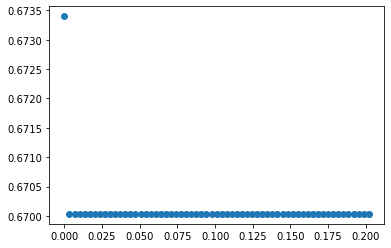

k:  2     beta:  0.05     alpha:  0.01     acc:  55.55555555555556


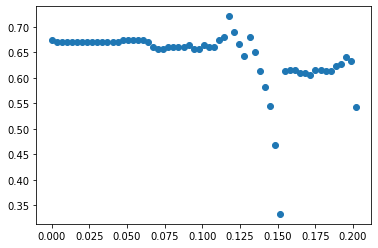

k:  2     beta:  5     alpha:  0.1     acc:  49.494949494949495


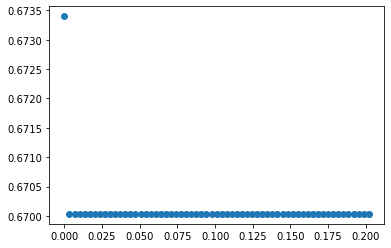

k:  2     beta:  5     alpha:  0.01     acc:  55.21885521885522


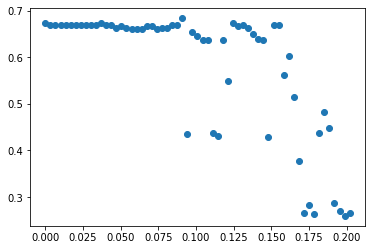

k:  2     beta:  10     alpha:  0.1     acc:  56.56565656565657


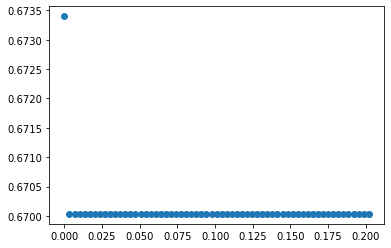

k:  2     beta:  10     alpha:  0.01     acc:  55.55555555555556


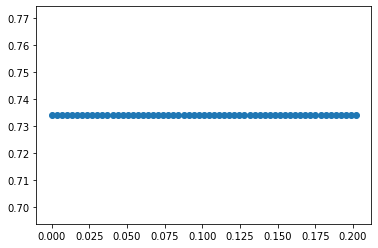

k:  3     beta:  0.05     alpha:  0.1     acc:  66.66666666666667


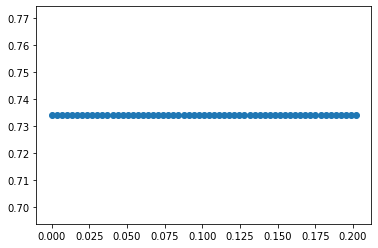

k:  3     beta:  0.05     alpha:  0.01     acc:  67.003367003367


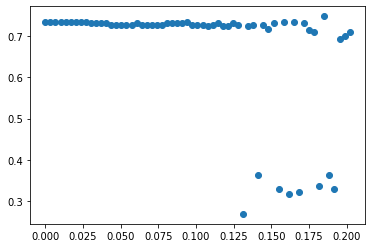

k:  3     beta:  5     alpha:  0.1     acc:  63.97306397306397


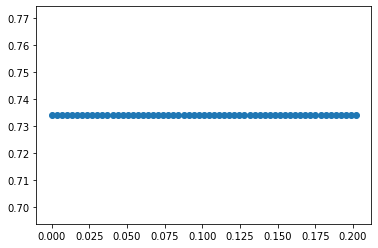

k:  3     beta:  5     alpha:  0.01     acc:  67.003367003367


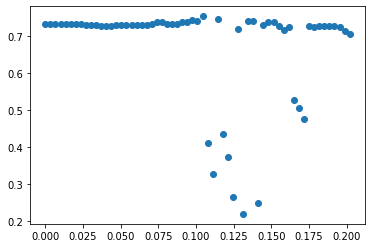

k:  3     beta:  10     alpha:  0.1     acc:  65.31986531986531


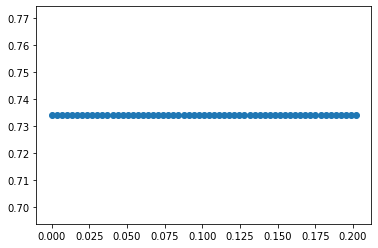

k:  3     beta:  10     alpha:  0.01     acc:  66.66666666666667


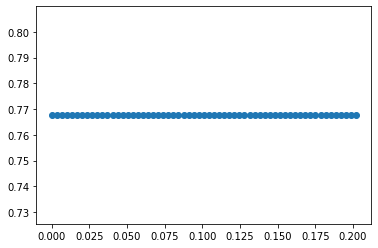

k:  4     beta:  0.05     alpha:  0.1     acc:  73.4006734006734


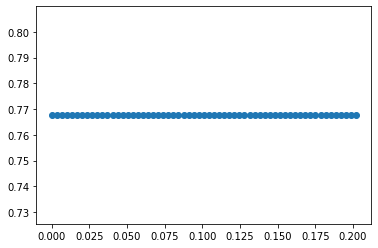

k:  4     beta:  0.05     alpha:  0.01     acc:  73.4006734006734


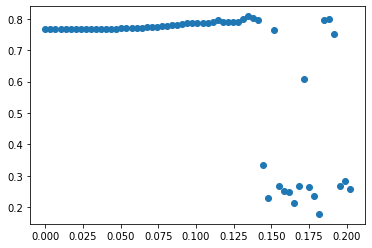

k:  4     beta:  5     alpha:  0.1     acc:  76.0942760942761


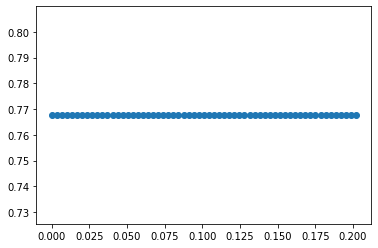

k:  4     beta:  5     alpha:  0.01     acc:  73.4006734006734


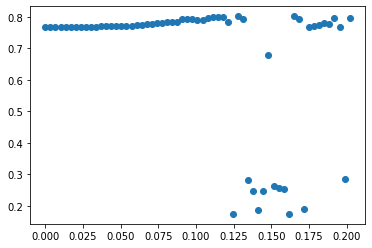

k:  4     beta:  10     alpha:  0.1     acc:  72.05387205387206


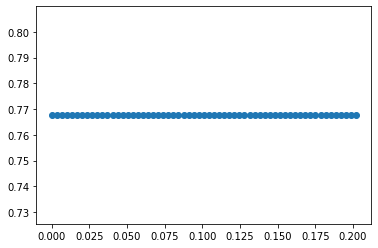

k:  4     beta:  10     alpha:  0.01     acc:  73.4006734006734


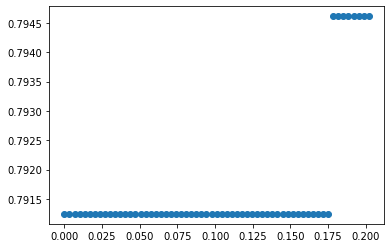

k:  5     beta:  0.05     alpha:  0.1     acc:  76.76767676767676


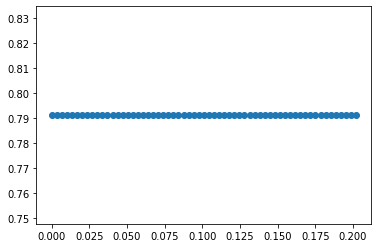

k:  5     beta:  0.05     alpha:  0.01     acc:  76.76767676767676


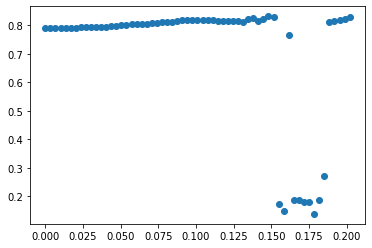

k:  5     beta:  5     alpha:  0.1     acc:  78.45117845117845


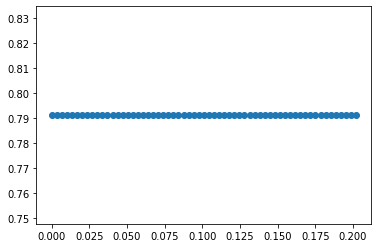

k:  5     beta:  5     alpha:  0.01     acc:  76.76767676767676


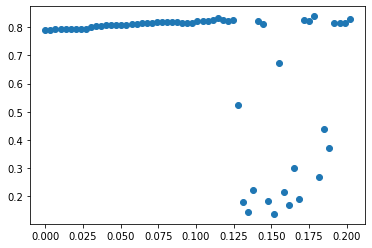

k:  5     beta:  10     alpha:  0.1     acc:  76.0942760942761


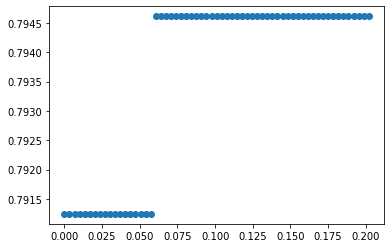

k:  5     beta:  10     alpha:  0.01     acc:  76.76767676767676


In [11]:
X_set, Y_set = heart_disease_dataset()

for k in range(1, 6):
  for beta in [0.05, 5, 10]:
    for alpha in [0.1, 0.01]:
      # initialize
      Jw_accuracy_procedure = []                        # variable to store Jw for ploting
      model_params = initialize_parameters(epochs=60, alpha=alpha, beta=beta, k=k)
      N = model_params['num_of_instances']
      k = model_params['k']
      alpha = model_params['alpha']
      beta = model_params['beta']

      learn_feature_weights()

      plot(Jw_accuracy_procedure)
      print("k: ", k, "    beta: ", beta, "    alpha: ", alpha, "    acc: ", get_accuracy(k))

#**Iris dataset results, epochs:60**

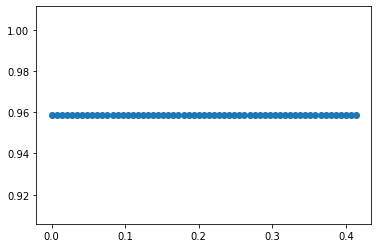

k:  1     beta:  0.05     alpha:  0.1     acc:  95.86206896551724


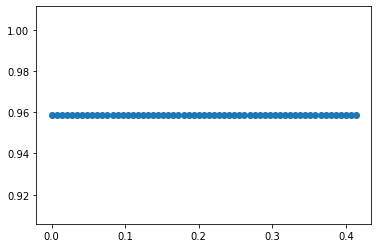

k:  1     beta:  0.05     alpha:  0.01     acc:  95.86206896551724


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp


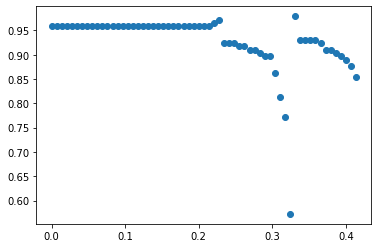

k:  1     beta:  5     alpha:  0.1     acc:  5.517241379310345


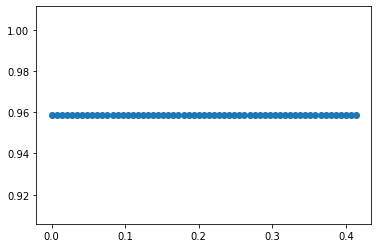

k:  1     beta:  5     alpha:  0.01     acc:  95.86206896551724


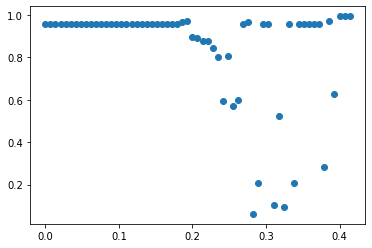

k:  1     beta:  10     alpha:  0.1     acc:  0.0


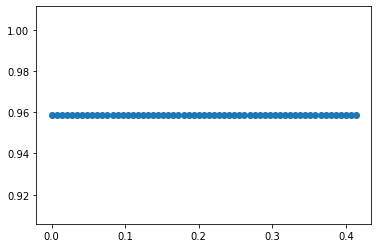

k:  1     beta:  10     alpha:  0.01     acc:  95.86206896551724


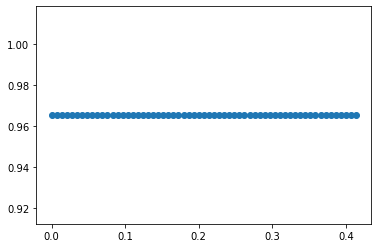

k:  2     beta:  0.05     alpha:  0.1     acc:  95.86206896551724


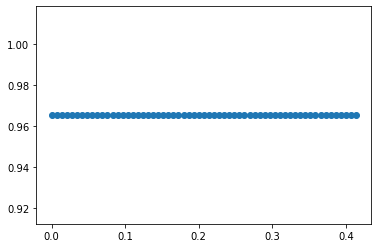

k:  2     beta:  0.05     alpha:  0.01     acc:  95.86206896551724


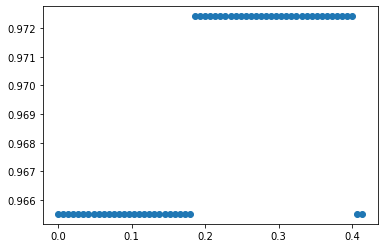

k:  2     beta:  5     alpha:  0.1     acc:  96.55172413793103


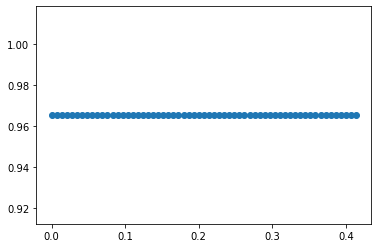

k:  2     beta:  5     alpha:  0.01     acc:  95.86206896551724


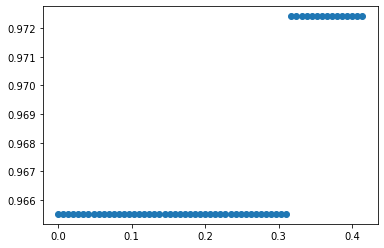

k:  2     beta:  10     alpha:  0.1     acc:  95.86206896551724


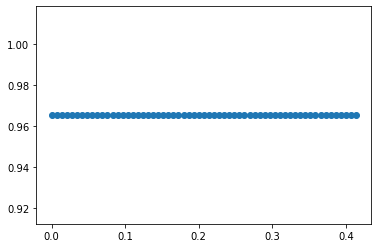

k:  2     beta:  10     alpha:  0.01     acc:  95.86206896551724


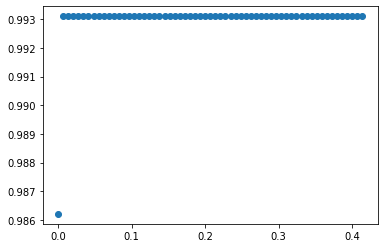

k:  3     beta:  0.05     alpha:  0.1     acc:  96.55172413793103


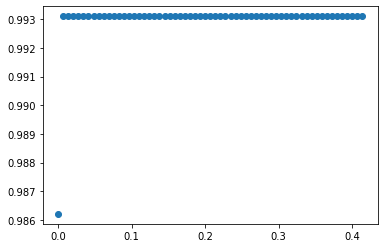

k:  3     beta:  0.05     alpha:  0.01     acc:  96.55172413793103


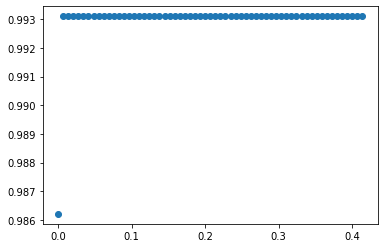

k:  3     beta:  5     alpha:  0.1     acc:  97.24137931034483


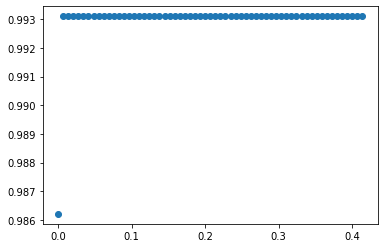

k:  3     beta:  5     alpha:  0.01     acc:  96.55172413793103


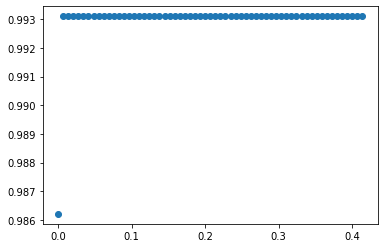

k:  3     beta:  10     alpha:  0.1     acc:  97.24137931034483


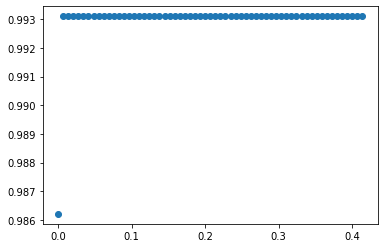

k:  3     beta:  10     alpha:  0.01     acc:  96.55172413793103


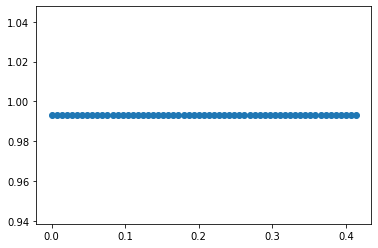

k:  4     beta:  0.05     alpha:  0.1     acc:  99.3103448275862


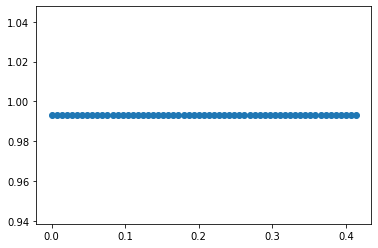

k:  4     beta:  0.05     alpha:  0.01     acc:  99.3103448275862


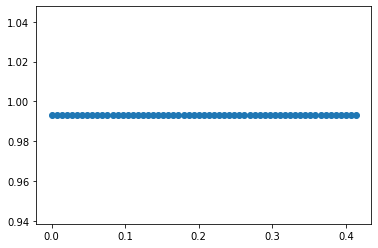

k:  4     beta:  5     alpha:  0.1     acc:  99.3103448275862


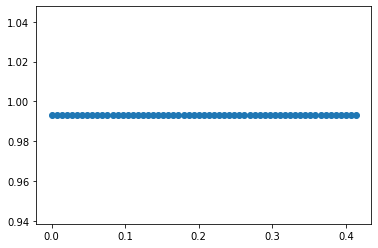

k:  4     beta:  5     alpha:  0.01     acc:  99.3103448275862


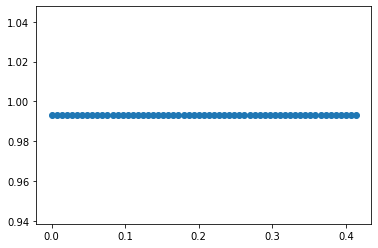

k:  4     beta:  10     alpha:  0.1     acc:  99.3103448275862


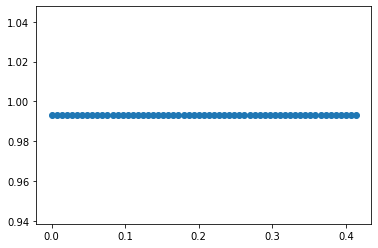

k:  4     beta:  10     alpha:  0.01     acc:  99.3103448275862


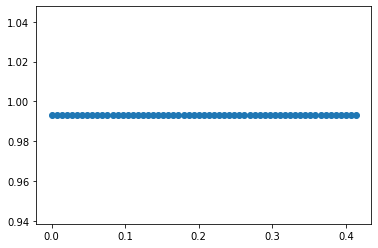

k:  5     beta:  0.05     alpha:  0.1     acc:  99.3103448275862


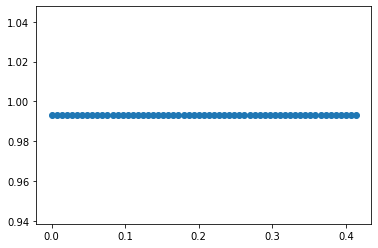

k:  5     beta:  0.05     alpha:  0.01     acc:  99.3103448275862


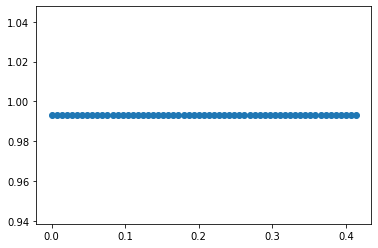

k:  5     beta:  5     alpha:  0.1     acc:  99.3103448275862


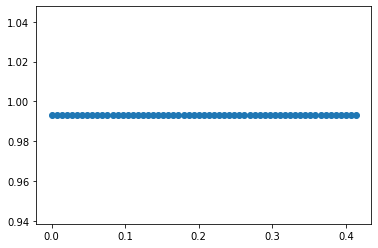

k:  5     beta:  5     alpha:  0.01     acc:  99.3103448275862


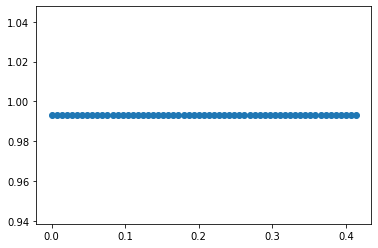

k:  5     beta:  10     alpha:  0.1     acc:  99.3103448275862


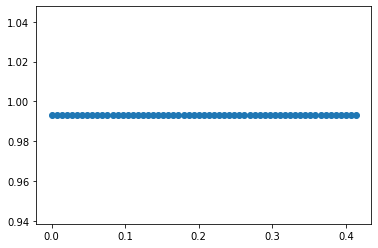

k:  5     beta:  10     alpha:  0.01     acc:  99.3103448275862


In [10]:
X_set, Y_set = iris_dataset()

for k in range(1, 6):
  for beta in [0.05, 5, 10]:
    for alpha in [0.1, 0.01]:
      # initialize
      Jw_accuracy_procedure = []                        # variable to store Jw for ploting
      model_params = initialize_parameters(epochs=60, alpha=alpha, beta=beta, k=k)
      N = model_params['num_of_instances']
      k = model_params['k']
      alpha = model_params['alpha']
      beta = model_params['beta']

      learn_feature_weights()
      
      plot(Jw_accuracy_procedure)
      print("k: ", k, "    beta: ", beta, "    alpha: ", alpha, "    acc: ", get_accuracy(k))